In [112]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import re
import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [113]:
import os

In [114]:
d2=pd.read_csv('D:\\oyo_hyd.csv')
d1=pd.read_csv('D:\\oyo_delhi.csv')

In [115]:
frames = [d2, d1]
  

In [116]:
d3 = pd.concat(frames)

In [117]:
d3

,Unnamed: 0,Unnamed: 0.1,Hotel Name,Cost Per Night,Rating,Features,Location,City,Locality,Cost_Price,...,Category,Hotel_Name,Parking Facility,wifi_availabilty,AC,Reception,CCTV Cameras,Doctor on Call,Power backup,Elevator
0,0,0,SPOT ON 37214 Classic Lodge,₹406₹119065% offper room per nightView Details...,4.5 (870 Ratings)·Excellent,AC Parking Facility Elevator + 8 more,"Near Board Of Intermediate Office, Hyderabad· ...",Hyderabad,Near Board Of Intermediate Office,1190.0,...,SPOT ON,ON 37214 Classic Lodge,no,no,no,no,no,no,no,no
1,1,1,OYO 24204 Nav Bharath Residency,₹978₹301767% offper room per nightView Details...,4.4 (988 Ratings)·Very Good,Reception Free Wifi Power backup + 17 more,"Near Central Gurudwara Saheb, Gowliguda, Hyder...",Hyderabad,Near Central Gurudwara Saheb,3017.0,...,OYO,24204 Nav Bharath Residency,yes,yes,yes,yes,yes,yes,yes,yes
2,2,2,OYO 35467 Shiridi Residency,₹1014₹222654% offper room per nightView Detail...,4.7 (937 Ratings)·Excellent,Reception Free Wifi Security + 10 more,"Near Chermas, Abids, Hyderabad· 1.3 km",Hyderabad,Near Chermas,2226.0,...,OYO,35467 Shiridi Residency,yes,yes,yes,yes,yes,yes,yes,yes
3,3,3,SPOT ON 75815 Hotel Kanha Residency,₹338₹123372% offper room per nightView Details...,3.8 (394 Ratings)·Good,TV,"India, Hyderabad· 3.1 km",Hyderabad,India,1233.0,...,SPOT ON,ON 75815 Hotel Kanha Residency,no,no,no,no,no,no,no,no
4,4,4,OYO 74978 Hotel Aadaab,₹646₹231772% offper room per nightView Details...,3.3 (240 Ratings)·Fair,Reception Free Wifi 24/7 Checkin + 12 more,"Near Nampally railway station, Mahesh Nagar, H...",Hyderabad,Near Nampally railway station,2317.0,...,OYO,74978 Hotel Aadaab,yes,yes,yes,yes,yes,yes,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,175,OYO 27979 Krishna Residency,₹899₹288268% offper room per nightView Details...,4.0 (883 Ratings)·Very Good,Private Entrance Reception Power backup + ...,"Near Iskcon Temple, kailash , Delhi",Delhi,"Near Iskcon Temple, kailash ,",2882.0,...,OYO,27979 Krishna Residency,no,no,no,no,no,no,no,no
176,176,176,OYO 85494 Osho Palace,₹625₹222971% offper room per nightView Details...,2.8 (79 Ratings)·Fair,Free Wifi Geyser CCTV Cameras + 4 more,"12,nagali rajapur, behind Lal Hotel, opposite ...",Delhi,"12,nagali rajapur, behind Lal Hotel, opposite ...",2229.0,...,OYO,85494 Osho Palace,yes,yes,yes,yes,yes,yes,yes,yes
177,177,177,Collection O 9266 Hotel Kapoor Inn,₹1684₹320747% offper room per nightView Detail...,3.3 (182 Ratings)·Fair,Reception Ticket Tour Assistance Free Wifi ...,"Near Kailash Colony Metro Station, Delhi",Delhi,"Near Kailash Colony Metro Station,",1684.0,...,Collection O,O 9266 Hotel Kapoor Inn,yes,yes,yes,yes,yes,yes,yes,yes
178,178,178,OYO 22354 PG Hospitality Inn,₹747₹225366% offper room per nightView Details...,3.9 (44 Ratings)·Good,Power backup TV Card Payment + 4 more,"Near New Delhi Railway Station, Delhi",Delhi,"Near New Railway Station,",2253.0,...,OYO,22354 PG Hospitality Inn,no,no,no,no,no,no,no,no


In [118]:
d3.drop(['Hotel Name','Cost Per Night','Rating','Features','Location'], inplace=True,axis = 1)

In [119]:
d3.head()

,Unnamed: 0,Unnamed: 0.1,City,Locality,Cost_Price,Discount,Selling_Price,Rate,Customer_Rating,Remarks,Category,Hotel_Name,Parking Facility,wifi_availabilty,AC,Reception,CCTV Cameras,Doctor on Call,Power backup,Elevator
0,0,0,Hyderabad,Near Board Of Intermediate Office,1190.0,65.0,406.0,4.5,870 Ratings,Excellent,SPOT ON,ON 37214 Classic Lodge,no,no,no,no,no,no,no,no
1,1,1,Hyderabad,Near Central Gurudwara Saheb,3017.0,67.0,978.0,4.4,988 Ratings,Very,OYO,24204 Nav Bharath Residency,yes,yes,yes,yes,yes,yes,yes,yes
2,2,2,Hyderabad,Near Chermas,2226.0,54.0,1014.0,4.7,937 Ratings,Excellent,OYO,35467 Shiridi Residency,yes,yes,yes,yes,yes,yes,yes,yes
3,3,3,Hyderabad,India,1233.0,72.0,338.0,3.8,394 Ratings,Good,SPOT ON,ON 75815 Hotel Kanha Residency,no,no,no,no,no,no,no,no
4,4,4,Hyderabad,Near Nampally railway station,2317.0,72.0,646.0,3.3,240 Ratings,Fair,OYO,74978 Hotel Aadaab,yes,yes,yes,yes,yes,yes,yes,yes


In [120]:
d3.drop(d3.columns[d3.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [121]:
d3.head()

,City,Locality,Cost_Price,Discount,Selling_Price,Rate,Customer_Rating,Remarks,Category,Hotel_Name,Parking Facility,wifi_availabilty,AC,Reception,CCTV Cameras,Doctor on Call,Power backup,Elevator
0,Hyderabad,Near Board Of Intermediate Office,1190.0,65.0,406.0,4.5,870 Ratings,Excellent,SPOT ON,ON 37214 Classic Lodge,no,no,no,no,no,no,no,no
1,Hyderabad,Near Central Gurudwara Saheb,3017.0,67.0,978.0,4.4,988 Ratings,Very,OYO,24204 Nav Bharath Residency,yes,yes,yes,yes,yes,yes,yes,yes
2,Hyderabad,Near Chermas,2226.0,54.0,1014.0,4.7,937 Ratings,Excellent,OYO,35467 Shiridi Residency,yes,yes,yes,yes,yes,yes,yes,yes
3,Hyderabad,India,1233.0,72.0,338.0,3.8,394 Ratings,Good,SPOT ON,ON 75815 Hotel Kanha Residency,no,no,no,no,no,no,no,no
4,Hyderabad,Near Nampally railway station,2317.0,72.0,646.0,3.3,240 Ratings,Fair,OYO,74978 Hotel Aadaab,yes,yes,yes,yes,yes,yes,yes,yes


In [122]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 0 to 179
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              326 non-null    object 
 1   Locality          325 non-null    object 
 2   Cost_Price        284 non-null    float64
 3   Discount          287 non-null    float64
 4   Selling_Price     287 non-null    float64
 5   Rate              314 non-null    float64
 6   Customer_Rating   314 non-null    object 
 7   Remarks           314 non-null    object 
 8   Category          317 non-null    object 
 9   Hotel_Name        326 non-null    object 
 10  Parking Facility  326 non-null    object 
 11  wifi_availabilty  326 non-null    object 
 12  AC                326 non-null    object 
 13  Reception         326 non-null    object 
 14  CCTV Cameras      326 non-null    object 
 15  Doctor on Call    326 non-null    object 
 16  Power backup      326 non-null    object 
 1

In [123]:
d3 = d3[['City', 'Category', 'Hotel_Name', 'Locality','Selling_Price','Cost_Price','Discount','Rate','Customer_Rating','Remarks','wifi_availabilty','CCTV Cameras','Doctor on Call','Parking Facility','Power backup','Elevator','Reception','AC']]

In [124]:
d3.head(20)

,City,Category,Hotel_Name,Locality,Selling_Price,Cost_Price,Discount,Rate,Customer_Rating,Remarks,wifi_availabilty,CCTV Cameras,Doctor on Call,Parking Facility,Power backup,Elevator,Reception,AC
0,Hyderabad,SPOT ON,ON 37214 Classic Lodge,Near Board Of Intermediate Office,406.0,1190.0,65.0,4.5,870 Ratings,Excellent,no,no,no,no,no,no,no,no
1,Hyderabad,OYO,24204 Nav Bharath Residency,Near Central Gurudwara Saheb,978.0,3017.0,67.0,4.4,988 Ratings,Very,yes,yes,yes,yes,yes,yes,yes,yes
2,Hyderabad,OYO,35467 Shiridi Residency,Near Chermas,1014.0,2226.0,54.0,4.7,937 Ratings,Excellent,yes,yes,yes,yes,yes,yes,yes,yes
3,Hyderabad,SPOT ON,ON 75815 Hotel Kanha Residency,India,338.0,1233.0,72.0,3.8,394 Ratings,Good,no,no,no,no,no,no,no,no
4,Hyderabad,OYO,74978 Hotel Aadaab,Near Nampally railway station,646.0,2317.0,72.0,3.3,240 Ratings,Fair,yes,yes,yes,yes,yes,yes,yes,yes
5,Hyderabad,SPOT ON,ON 80705 Balaji Residency,Hyderabad,272.0,1074.0,74.0,3.1,799 Ratings,Fair,no,no,no,no,no,no,no,no
6,Hyderabad,SPOT ON,ON 72246 Gayatri Lodge,Ranigunj,266.0,NaN,71.0,3.8,286 Ratings,Good,yes,yes,yes,yes,yes,yes,yes,yes
7,Hyderabad,OYO,16428 Hotel Vaishnavi Inn,Secunderabad,891.0,1920.0,53.0,4.4,2453 Ratings,Very,yes,yes,yes,yes,yes,yes,yes,yes
8,Hyderabad,OYO,77239 Hotel Rajdhani,Beside Bharat Petrol pump. opp Matro Station p...,687.0,2298.0,70.0,2.9,165 Ratings,Fair,no,no,no,no,no,no,no,no
9,Hyderabad,OYO,88350 Hanuma Residency,Behind OZONE Hospital· 6.9 km,751.0,1431.0,47.0,4.9,28 Ratings,Fabulous,no,no,no,no,no,no,no,no


In [125]:
d3.to_csv("D:\\Projects Innomatics\\Concat_HydDel.csv")

In [126]:
d3.to_excel("D:\\Projects Innomatics\\Concat_HydDel.xlsx")

In [127]:
d3.shape

(326, 18)

In [128]:
d3.isnull().sum()/len(d3)*100

City                 0.000000
Category             2.760736
Hotel_Name           0.000000
Locality             0.306748
Selling_Price       11.963190
Cost_Price          12.883436
Discount            11.963190
Rate                 3.680982
Customer_Rating      3.680982
Remarks              3.680982
wifi_availabilty     0.000000
CCTV Cameras         0.000000
Doctor on Call       0.000000
Parking Facility     0.000000
Power backup         0.000000
Elevator             0.000000
Reception            0.000000
AC                   0.000000
dtype: float64

In [129]:
d3.isnull().sum()

City                 0
Category             9
Hotel_Name           0
Locality             1
Selling_Price       39
Cost_Price          42
Discount            39
Rate                12
Customer_Rating     12
Remarks             12
wifi_availabilty     0
CCTV Cameras         0
Doctor on Call       0
Parking Facility     0
Power backup         0
Elevator             0
Reception            0
AC                   0
dtype: int64

In [130]:
d3[d3["Locality"].isnull()]["Selling_Price"].median()

nan

In [131]:
d3[d3["Selling_Price"]< 930.5]["Locality"].value_counts()

India,                                                                                      22
,                                                                                           13
Near New  Railway Station,                                                                  10
India                                                                                        9
Hyderabad                                                                                    3
                                                                                            ..
Near Star Super Market                                                                       1
near erragadda metro                                                                         1
Near Monda Market                                                                            1
Near Bozai functional hall                                                                   1
12,nagali rajapur, behind Lal Hotel, opposite haza

In [132]:
d3[d3["City"]=="Hyderabad"]["Locality"].value_counts()

India                            14
Hyderabad                         7
Centrally Located                 4
Telangana                         3
Secunderabad                      3
                                 ..
Near Regional Passport Office     1
Champapet                         1
Indiaf                            1
Near Narayana High School         1
Begumpet                          1
Name: Locality, Length: 114, dtype: int64

In [133]:
#d3.loc[d3['Locality'].isnull(),'Locality']= "NearCentralGurudwaraSaheb Gowliguda"

In [134]:
d3["Locality"]=d3['Locality'].replace(np.nan, 'NearCentralGurudwaraSaheb Gowliguda')

In [135]:
d3.isnull().sum()

City                 0
Category             9
Hotel_Name           0
Locality             0
Selling_Price       39
Cost_Price          42
Discount            39
Rate                12
Customer_Rating     12
Remarks             12
wifi_availabilty     0
CCTV Cameras         0
Doctor on Call       0
Parking Facility     0
Power backup         0
Elevator             0
Reception            0
AC                   0
dtype: int64

In [136]:
#d3[d3["Selling_Price"].isnull()][""].median()

In [137]:
d3["Selling_Price"].isnull().sum()

39

In [138]:
d3[d3['Selling_Price'].isnull()]

,City,Category,Hotel_Name,Locality,Selling_Price,Cost_Price,Discount,Rate,Customer_Rating,Remarks,wifi_availabilty,CCTV Cameras,Doctor on Call,Parking Facility,Power backup,Elevator,Reception,AC
107,Hyderabad,OYO,Townhouse White Ridge 112 Shivam Road,New Nallakunta,NaN,NaN,NaN,4.3,2089 Ratings,Very,no,no,no,no,no,no,no,no
108,Hyderabad,OYO,Flagship 83917 Lakeview Palace,Hyderabad,NaN,NaN,NaN,4.7,354 Ratings,Excellent,yes,yes,yes,yes,yes,yes,yes,yes
109,Hyderabad,OYO,HYD1516 Hotel Aroma Classic,Ghosha Mahal,NaN,NaN,NaN,4.2,847 Ratings,Very,yes,yes,yes,yes,yes,yes,yes,yes
110,Hyderabad,OYO,6651 Hotel Srujana Stay Inn,Opposite Public Garden Nampally,NaN,NaN,NaN,4.1,1079 Ratings,Very,yes,yes,yes,yes,yes,yes,yes,yes
111,Hyderabad,Collection O,O 63872 Enchanting Spaces,Near Railway Officer Colony,NaN,NaN,NaN,4.2,1331 Ratings,Very,yes,yes,yes,yes,yes,yes,yes,yes
112,Hyderabad,OYO,71210 Jubilee Homes,Centrally Located,NaN,NaN,NaN,4.5,252 Ratings,Excellent,no,no,no,no,no,no,no,no
113,Hyderabad,OYO,78286 Collection O White Ridge,LB Nagar,NaN,NaN,NaN,4.5,3014 Ratings,Excellent,no,no,no,no,no,no,no,no
114,Hyderabad,OYO,Flagship 18926 Tourist Krishna Inn,Near Barkatpura Rd,NaN,NaN,NaN,3.6,376 Ratings,Good,yes,yes,yes,yes,yes,yes,yes,yes
115,Hyderabad,OYO,10139 Hotel Palak Residency,Metro Pillar no: A947,NaN,NaN,NaN,4.2,1559 Ratings,Very,no,no,no,no,no,no,no,no
116,Hyderabad,SPOT ON,ON 47118 Pummy Lodge,Centrally Located,NaN,NaN,NaN,2.5,151 Ratings,Fair,no,no,no,no,no,no,no,no


In [139]:
d3[d3["Selling_Price"].isnull()]["Rate"].median()

4.1

In [140]:
d3[d3["Rate"]==4.6]["Locality"].value_counts()

India,                                                                       2
Near New  Railway Station,                                                   2
Below Flyover                                                                1
Opp to Js babu silks.                                                        1
Sanath Nagar                                                                 1
Near Ashok Park Main, Rampura Marg,                                          1
Badarpur Border,                                                             1
60/61 Main Rampura School road, near ashok park main metro station-110086    1
PHARAGANJ,                                                                   1
Near new delhi railway station, Chuna Mandi,                                 1
Near RK ASHRAM METRO STATION, Pahar Ganj,                                    1
New  110061,                                                                 1
,                                                   

In [141]:
d3[d3["City"]=="Hyderabad"]["Hotel_Name"].value_counts()

Flagship 83824 Hotel R Square      2
ON 37214 Classic Lodge             1
O 80304 Hotel PNR Banjara Hills    1
O 89127 Hotel Samrat Palace        1
26650 R Square                     1
                                  ..
ON 82532 Hotel Vivin               1
85469 Star Residential Hotel       1
69510 Hotel 3m                     1
O 65104 Che Sigma Hotel            1
12237 Luxury Villas                1
Name: Hotel_Name, Length: 145, dtype: int64

In [142]:
d3['Selling_Price'].median()

775.0

In [143]:
d3['Selling_Price']=d3['Selling_Price'].fillna(d3['Selling_Price'].median())

In [144]:
d3.isnull().sum()

City                 0
Category             9
Hotel_Name           0
Locality             0
Selling_Price        0
Cost_Price          42
Discount            39
Rate                12
Customer_Rating     12
Remarks             12
wifi_availabilty     0
CCTV Cameras         0
Doctor on Call       0
Parking Facility     0
Power backup         0
Elevator             0
Reception            0
AC                   0
dtype: int64

In [145]:
d3['Cost_Price'].median()

2054.0

In [146]:
d3['Cost_Price'].mean()

2051.950704225352

In [147]:
d3['Cost_Price']=d3['Cost_Price'].fillna(d3['Cost_Price'].mean())

In [148]:
d3.isnull().sum()

City                 0
Category             9
Hotel_Name           0
Locality             0
Selling_Price        0
Cost_Price           0
Discount            39
Rate                12
Customer_Rating     12
Remarks             12
wifi_availabilty     0
CCTV Cameras         0
Doctor on Call       0
Parking Facility     0
Power backup         0
Elevator             0
Reception            0
AC                   0
dtype: int64

In [149]:
d3[d3['Discount'].isnull()]

,City,Category,Hotel_Name,Locality,Selling_Price,Cost_Price,Discount,Rate,Customer_Rating,Remarks,wifi_availabilty,CCTV Cameras,Doctor on Call,Parking Facility,Power backup,Elevator,Reception,AC
107,Hyderabad,OYO,Townhouse White Ridge 112 Shivam Road,New Nallakunta,775.0,2051.950704,NaN,4.3,2089 Ratings,Very,no,no,no,no,no,no,no,no
108,Hyderabad,OYO,Flagship 83917 Lakeview Palace,Hyderabad,775.0,2051.950704,NaN,4.7,354 Ratings,Excellent,yes,yes,yes,yes,yes,yes,yes,yes
109,Hyderabad,OYO,HYD1516 Hotel Aroma Classic,Ghosha Mahal,775.0,2051.950704,NaN,4.2,847 Ratings,Very,yes,yes,yes,yes,yes,yes,yes,yes
110,Hyderabad,OYO,6651 Hotel Srujana Stay Inn,Opposite Public Garden Nampally,775.0,2051.950704,NaN,4.1,1079 Ratings,Very,yes,yes,yes,yes,yes,yes,yes,yes
111,Hyderabad,Collection O,O 63872 Enchanting Spaces,Near Railway Officer Colony,775.0,2051.950704,NaN,4.2,1331 Ratings,Very,yes,yes,yes,yes,yes,yes,yes,yes
112,Hyderabad,OYO,71210 Jubilee Homes,Centrally Located,775.0,2051.950704,NaN,4.5,252 Ratings,Excellent,no,no,no,no,no,no,no,no
113,Hyderabad,OYO,78286 Collection O White Ridge,LB Nagar,775.0,2051.950704,NaN,4.5,3014 Ratings,Excellent,no,no,no,no,no,no,no,no
114,Hyderabad,OYO,Flagship 18926 Tourist Krishna Inn,Near Barkatpura Rd,775.0,2051.950704,NaN,3.6,376 Ratings,Good,yes,yes,yes,yes,yes,yes,yes,yes
115,Hyderabad,OYO,10139 Hotel Palak Residency,Metro Pillar no: A947,775.0,2051.950704,NaN,4.2,1559 Ratings,Very,no,no,no,no,no,no,no,no
116,Hyderabad,SPOT ON,ON 47118 Pummy Lodge,Centrally Located,775.0,2051.950704,NaN,2.5,151 Ratings,Fair,no,no,no,no,no,no,no,no


In [150]:
d3['Discount'].mean()

61.22648083623693

In [151]:
d3['Discount'].median()

62.0

In [152]:
d3['Discount']=d3['Discount'].fillna(d3['Discount'].mean())

In [153]:
d3.isnull().sum()

City                 0
Category             9
Hotel_Name           0
Locality             0
Selling_Price        0
Cost_Price           0
Discount             0
Rate                12
Customer_Rating     12
Remarks             12
wifi_availabilty     0
CCTV Cameras         0
Doctor on Call       0
Parking Facility     0
Power backup         0
Elevator             0
Reception            0
AC                   0
dtype: int64

In [154]:
d3[d3['Rate'].isnull()]

,City,Category,Hotel_Name,Locality,Selling_Price,Cost_Price,Discount,Rate,Customer_Rating,Remarks,wifi_availabilty,CCTV Cameras,Doctor on Call,Parking Facility,Power backup,Elevator,Reception,AC
39,Hyderabad,NaN,89189 Pratap Luxery Properties,Hyderabad,1216.0,2315.0,47.0,NaN,NaN,NaN,yes,yes,yes,yes,yes,yes,yes,yes
45,Hyderabad,OYO,89208 Devi Residency,India,1216.0,2315.0,47.0,NaN,NaN,NaN,yes,yes,yes,yes,yes,yes,yes,yes
65,Hyderabad,OYO,HOME 88937 Kanaka Durga Home Stay,500001,1014.0,1931.0,47.0,NaN,NaN,NaN,yes,yes,yes,yes,yes,yes,yes,yes
70,Hyderabad,OYO,89107 Royal Stay,3-4-400/36/1 Upperpally Rajendranagar Ranga Re...,1528.0,2911.0,47.0,NaN,NaN,NaN,yes,yes,yes,yes,yes,yes,yes,yes
95,Hyderabad,Capital O,O 89127 Hotel Samrat Palace,India,1594.0,3037.0,47.0,NaN,NaN,NaN,yes,yes,yes,yes,yes,yes,yes,yes
21,Delhi,SPOT ON,ON 83214 Raj Guest House,"India,",454.0,2080.0,78.0,NaN,NaN,NaN,yes,yes,yes,yes,yes,yes,yes,yes
51,Delhi,OYO,89006 Bhera Residency,",",821.0,1804.0,54.0,NaN,NaN,NaN,yes,yes,yes,yes,yes,yes,yes,yes
53,Delhi,OYO,HOME 87744 Khattar,"India,",489.0,1703.0,71.0,NaN,NaN,NaN,yes,yes,yes,yes,yes,yes,yes,yes
63,Delhi,Townhouse,963 Hotel The Victorian Palace,"Opposite Jain Mandir,",1216.0,1216.0,48.0,NaN,NaN,NaN,no,no,no,no,no,no,no,no
114,Delhi,Capital O,O 88320 Hotel Grand Stays,",",985.0,2206.0,55.0,NaN,NaN,NaN,no,no,no,no,no,no,no,no


In [155]:
d3['Rate'].mean()

3.8464968152866246

In [156]:
d3['Rate'].median()

3.9

In [157]:
d3['Rate']=d3['Rate'].fillna(d3['Rate'].mean())

In [158]:
d3.isnull().sum()

City                 0
Category             9
Hotel_Name           0
Locality             0
Selling_Price        0
Cost_Price           0
Discount             0
Rate                 0
Customer_Rating     12
Remarks             12
wifi_availabilty     0
CCTV Cameras         0
Doctor on Call       0
Parking Facility     0
Power backup         0
Elevator             0
Reception            0
AC                   0
dtype: int64

In [159]:
d3[d3['Customer_Rating'].isnull()]

,City,Category,Hotel_Name,Locality,Selling_Price,Cost_Price,Discount,Rate,Customer_Rating,Remarks,wifi_availabilty,CCTV Cameras,Doctor on Call,Parking Facility,Power backup,Elevator,Reception,AC
39,Hyderabad,NaN,89189 Pratap Luxery Properties,Hyderabad,1216.0,2315.0,47.0,3.846497,NaN,NaN,yes,yes,yes,yes,yes,yes,yes,yes
45,Hyderabad,OYO,89208 Devi Residency,India,1216.0,2315.0,47.0,3.846497,NaN,NaN,yes,yes,yes,yes,yes,yes,yes,yes
65,Hyderabad,OYO,HOME 88937 Kanaka Durga Home Stay,500001,1014.0,1931.0,47.0,3.846497,NaN,NaN,yes,yes,yes,yes,yes,yes,yes,yes
70,Hyderabad,OYO,89107 Royal Stay,3-4-400/36/1 Upperpally Rajendranagar Ranga Re...,1528.0,2911.0,47.0,3.846497,NaN,NaN,yes,yes,yes,yes,yes,yes,yes,yes
95,Hyderabad,Capital O,O 89127 Hotel Samrat Palace,India,1594.0,3037.0,47.0,3.846497,NaN,NaN,yes,yes,yes,yes,yes,yes,yes,yes
21,Delhi,SPOT ON,ON 83214 Raj Guest House,"India,",454.0,2080.0,78.0,3.846497,NaN,NaN,yes,yes,yes,yes,yes,yes,yes,yes
51,Delhi,OYO,89006 Bhera Residency,",",821.0,1804.0,54.0,3.846497,NaN,NaN,yes,yes,yes,yes,yes,yes,yes,yes
53,Delhi,OYO,HOME 87744 Khattar,"India,",489.0,1703.0,71.0,3.846497,NaN,NaN,yes,yes,yes,yes,yes,yes,yes,yes
63,Delhi,Townhouse,963 Hotel The Victorian Palace,"Opposite Jain Mandir,",1216.0,1216.0,48.0,3.846497,NaN,NaN,no,no,no,no,no,no,no,no
114,Delhi,Capital O,O 88320 Hotel Grand Stays,",",985.0,2206.0,55.0,3.846497,NaN,NaN,no,no,no,no,no,no,no,no


In [160]:
d3['Customer_Rating'].mode()[0]

'8 Ratings'

In [161]:
d3['Customer_Rating']=d3['Customer_Rating'].fillna(d3['Customer_Rating'].mode()[0])

In [162]:
d3.isnull().sum()

City                 0
Category             9
Hotel_Name           0
Locality             0
Selling_Price        0
Cost_Price           0
Discount             0
Rate                 0
Customer_Rating      0
Remarks             12
wifi_availabilty     0
CCTV Cameras         0
Doctor on Call       0
Parking Facility     0
Power backup         0
Elevator             0
Reception            0
AC                   0
dtype: int64

In [163]:
d3[d3['Remarks'].isnull()]

,City,Category,Hotel_Name,Locality,Selling_Price,Cost_Price,Discount,Rate,Customer_Rating,Remarks,wifi_availabilty,CCTV Cameras,Doctor on Call,Parking Facility,Power backup,Elevator,Reception,AC
39,Hyderabad,NaN,89189 Pratap Luxery Properties,Hyderabad,1216.0,2315.0,47.0,3.846497,8 Ratings,NaN,yes,yes,yes,yes,yes,yes,yes,yes
45,Hyderabad,OYO,89208 Devi Residency,India,1216.0,2315.0,47.0,3.846497,8 Ratings,NaN,yes,yes,yes,yes,yes,yes,yes,yes
65,Hyderabad,OYO,HOME 88937 Kanaka Durga Home Stay,500001,1014.0,1931.0,47.0,3.846497,8 Ratings,NaN,yes,yes,yes,yes,yes,yes,yes,yes
70,Hyderabad,OYO,89107 Royal Stay,3-4-400/36/1 Upperpally Rajendranagar Ranga Re...,1528.0,2911.0,47.0,3.846497,8 Ratings,NaN,yes,yes,yes,yes,yes,yes,yes,yes
95,Hyderabad,Capital O,O 89127 Hotel Samrat Palace,India,1594.0,3037.0,47.0,3.846497,8 Ratings,NaN,yes,yes,yes,yes,yes,yes,yes,yes
21,Delhi,SPOT ON,ON 83214 Raj Guest House,"India,",454.0,2080.0,78.0,3.846497,8 Ratings,NaN,yes,yes,yes,yes,yes,yes,yes,yes
51,Delhi,OYO,89006 Bhera Residency,",",821.0,1804.0,54.0,3.846497,8 Ratings,NaN,yes,yes,yes,yes,yes,yes,yes,yes
53,Delhi,OYO,HOME 87744 Khattar,"India,",489.0,1703.0,71.0,3.846497,8 Ratings,NaN,yes,yes,yes,yes,yes,yes,yes,yes
63,Delhi,Townhouse,963 Hotel The Victorian Palace,"Opposite Jain Mandir,",1216.0,1216.0,48.0,3.846497,8 Ratings,NaN,no,no,no,no,no,no,no,no
114,Delhi,Capital O,O 88320 Hotel Grand Stays,",",985.0,2206.0,55.0,3.846497,8 Ratings,NaN,no,no,no,no,no,no,no,no


In [164]:
d3['Remarks'].mode()[0]

'Fair'

In [165]:
d3['Remarks']=d3['Remarks'].fillna(d3['Remarks'].mode()[0])

In [166]:
d3.isnull().sum()

City                0
Category            9
Hotel_Name          0
Locality            0
Selling_Price       0
Cost_Price          0
Discount            0
Rate                0
Customer_Rating     0
Remarks             0
wifi_availabilty    0
CCTV Cameras        0
Doctor on Call      0
Parking Facility    0
Power backup        0
Elevator            0
Reception           0
AC                  0
dtype: int64

In [167]:
d3['Category'].mode()[0]


'OYO'

In [168]:
d3['Category']=d3['Category'].fillna(d3['Category'].mode()[0])

In [169]:
d3.isnull().sum()

City                0
Category            0
Hotel_Name          0
Locality            0
Selling_Price       0
Cost_Price          0
Discount            0
Rate                0
Customer_Rating     0
Remarks             0
wifi_availabilty    0
CCTV Cameras        0
Doctor on Call      0
Parking Facility    0
Power backup        0
Elevator            0
Reception           0
AC                  0
dtype: int64

In [170]:
d3

,City,Category,Hotel_Name,Locality,Selling_Price,Cost_Price,Discount,Rate,Customer_Rating,Remarks,wifi_availabilty,CCTV Cameras,Doctor on Call,Parking Facility,Power backup,Elevator,Reception,AC
0,Hyderabad,SPOT ON,ON 37214 Classic Lodge,Near Board Of Intermediate Office,406.0,1190.0,65.0,4.5,870 Ratings,Excellent,no,no,no,no,no,no,no,no
1,Hyderabad,OYO,24204 Nav Bharath Residency,Near Central Gurudwara Saheb,978.0,3017.0,67.0,4.4,988 Ratings,Very,yes,yes,yes,yes,yes,yes,yes,yes
2,Hyderabad,OYO,35467 Shiridi Residency,Near Chermas,1014.0,2226.0,54.0,4.7,937 Ratings,Excellent,yes,yes,yes,yes,yes,yes,yes,yes
3,Hyderabad,SPOT ON,ON 75815 Hotel Kanha Residency,India,338.0,1233.0,72.0,3.8,394 Ratings,Good,no,no,no,no,no,no,no,no
4,Hyderabad,OYO,74978 Hotel Aadaab,Near Nampally railway station,646.0,2317.0,72.0,3.3,240 Ratings,Fair,yes,yes,yes,yes,yes,yes,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Delhi,OYO,27979 Krishna Residency,"Near Iskcon Temple, kailash ,",899.0,2882.0,68.0,4.0,3 Ratings,Very,no,no,no,no,no,no,no,no
176,Delhi,OYO,85494 Osho Palace,"12,nagali rajapur, behind Lal Hotel, opposite ...",625.0,2229.0,71.0,2.8,9 Ratings,Fair,yes,yes,yes,yes,yes,yes,yes,yes
177,Delhi,Collection O,O 9266 Hotel Kapoor Inn,"Near Kailash Colony Metro Station,",1684.0,1684.0,47.0,3.3,2 Ratings,Fair,yes,yes,yes,yes,yes,yes,yes,yes
178,Delhi,OYO,22354 PG Hospitality Inn,"Near New Railway Station,",747.0,2253.0,66.0,3.9,4 Ratings,Good,no,no,no,no,no,no,no,no


In [171]:
d3.head()

,City,Category,Hotel_Name,Locality,Selling_Price,Cost_Price,Discount,Rate,Customer_Rating,Remarks,wifi_availabilty,CCTV Cameras,Doctor on Call,Parking Facility,Power backup,Elevator,Reception,AC
0,Hyderabad,SPOT ON,ON 37214 Classic Lodge,Near Board Of Intermediate Office,406.0,1190.0,65.0,4.5,870 Ratings,Excellent,no,no,no,no,no,no,no,no
1,Hyderabad,OYO,24204 Nav Bharath Residency,Near Central Gurudwara Saheb,978.0,3017.0,67.0,4.4,988 Ratings,Very,yes,yes,yes,yes,yes,yes,yes,yes
2,Hyderabad,OYO,35467 Shiridi Residency,Near Chermas,1014.0,2226.0,54.0,4.7,937 Ratings,Excellent,yes,yes,yes,yes,yes,yes,yes,yes
3,Hyderabad,SPOT ON,ON 75815 Hotel Kanha Residency,India,338.0,1233.0,72.0,3.8,394 Ratings,Good,no,no,no,no,no,no,no,no
4,Hyderabad,OYO,74978 Hotel Aadaab,Near Nampally railway station,646.0,2317.0,72.0,3.3,240 Ratings,Fair,yes,yes,yes,yes,yes,yes,yes,yes


In [172]:
d3['Rating']=d3['Customer_Rating'].apply(lambda x:x.split()[0])

In [173]:
d3['Customer_Rating'].str.split(' ', 1, expand=True)

,0,1
0,870,Ratings
1,988,Ratings
2,937,Ratings
3,394,Ratings
4,240,Ratings
...,...,...
175,3,Ratings
176,9,Ratings
177,2,Ratings
178,4,Ratings


In [174]:
d3.head()

,City,Category,Hotel_Name,Locality,Selling_Price,Cost_Price,Discount,Rate,Customer_Rating,Remarks,wifi_availabilty,CCTV Cameras,Doctor on Call,Parking Facility,Power backup,Elevator,Reception,AC,Rating
0,Hyderabad,SPOT ON,ON 37214 Classic Lodge,Near Board Of Intermediate Office,406.0,1190.0,65.0,4.5,870 Ratings,Excellent,no,no,no,no,no,no,no,no,870
1,Hyderabad,OYO,24204 Nav Bharath Residency,Near Central Gurudwara Saheb,978.0,3017.0,67.0,4.4,988 Ratings,Very,yes,yes,yes,yes,yes,yes,yes,yes,988
2,Hyderabad,OYO,35467 Shiridi Residency,Near Chermas,1014.0,2226.0,54.0,4.7,937 Ratings,Excellent,yes,yes,yes,yes,yes,yes,yes,yes,937
3,Hyderabad,SPOT ON,ON 75815 Hotel Kanha Residency,India,338.0,1233.0,72.0,3.8,394 Ratings,Good,no,no,no,no,no,no,no,no,394
4,Hyderabad,OYO,74978 Hotel Aadaab,Near Nampally railway station,646.0,2317.0,72.0,3.3,240 Ratings,Fair,yes,yes,yes,yes,yes,yes,yes,yes,240


In [175]:
d3.drop(['Customer_Rating'], inplace=True,axis = 1)

In [176]:
d3.head()

,City,Category,Hotel_Name,Locality,Selling_Price,Cost_Price,Discount,Rate,Remarks,wifi_availabilty,CCTV Cameras,Doctor on Call,Parking Facility,Power backup,Elevator,Reception,AC,Rating
0,Hyderabad,SPOT ON,ON 37214 Classic Lodge,Near Board Of Intermediate Office,406.0,1190.0,65.0,4.5,Excellent,no,no,no,no,no,no,no,no,870
1,Hyderabad,OYO,24204 Nav Bharath Residency,Near Central Gurudwara Saheb,978.0,3017.0,67.0,4.4,Very,yes,yes,yes,yes,yes,yes,yes,yes,988
2,Hyderabad,OYO,35467 Shiridi Residency,Near Chermas,1014.0,2226.0,54.0,4.7,Excellent,yes,yes,yes,yes,yes,yes,yes,yes,937
3,Hyderabad,SPOT ON,ON 75815 Hotel Kanha Residency,India,338.0,1233.0,72.0,3.8,Good,no,no,no,no,no,no,no,no,394
4,Hyderabad,OYO,74978 Hotel Aadaab,Near Nampally railway station,646.0,2317.0,72.0,3.3,Fair,yes,yes,yes,yes,yes,yes,yes,yes,240


In [177]:
d3 = d3[['City', 'Category', 'Hotel_Name', 'Locality','Cost_Price','Discount','Selling_Price','Rate','Rating','Remarks','wifi_availabilty','CCTV Cameras','Doctor on Call','Parking Facility','Power backup','Elevator','Reception','AC']]

In [178]:
d3.head(3)

,City,Category,Hotel_Name,Locality,Cost_Price,Discount,Selling_Price,Rate,Rating,Remarks,wifi_availabilty,CCTV Cameras,Doctor on Call,Parking Facility,Power backup,Elevator,Reception,AC
0,Hyderabad,SPOT ON,ON 37214 Classic Lodge,Near Board Of Intermediate Office,1190.0,65.0,406.0,4.5,870,Excellent,no,no,no,no,no,no,no,no
1,Hyderabad,OYO,24204 Nav Bharath Residency,Near Central Gurudwara Saheb,3017.0,67.0,978.0,4.4,988,Very,yes,yes,yes,yes,yes,yes,yes,yes
2,Hyderabad,OYO,35467 Shiridi Residency,Near Chermas,2226.0,54.0,1014.0,4.7,937,Excellent,yes,yes,yes,yes,yes,yes,yes,yes


In [183]:
d3.rename(columns={'Cost_Price': 'Original Price', 'Selling_Price': 'Offer Price', 'Rate': 'Star Rating', 'wifi_availabilty': 'Wi-Fi'}, inplace=True)

In [184]:
d3.head(1)

,City,Category,Hotel_Name,Locality,Original Price,Discount,Offer Price,Star Rating,Rating,Remarks,Wi-Fi,CCTV Cameras,Doctor on Call,Parking Facility,Power backup,Elevator,Reception,AC
0,Hyderabad,SPOT ON,ON 37214 Classic Lodge,Near Board Of Intermediate Office,1190.0,65.0,406.0,4.5,870,Excellent,no,no,no,no,no,no,no,no


In [185]:
d3.to_excel("D:\\Projects Innomatics\\Concat_HydDel.xlsx")

In [186]:
d3.to_csv("D:\\Projects Innomatics\\Concat_HydDel.csv")

### Univariate Analysis

In [56]:
d3['Category'].describe()

count     323
unique      5
top       OYO
freq      275
Name: Category, dtype: object

In [57]:
d3["Category"].value_counts()

OYO             275
Collection O     17
Capital O        14
SPOT ON           9
Townhouse         8
Name: Category, dtype: int64

In [58]:
cat_oyo=pd.DataFrame(d3["Category"].value_counts())
cat_oyo

,Category
OYO,275
Collection O,17
Capital O,14
SPOT ON,9
Townhouse,8


<AxesSubplot:xlabel='Category', ylabel='count'>

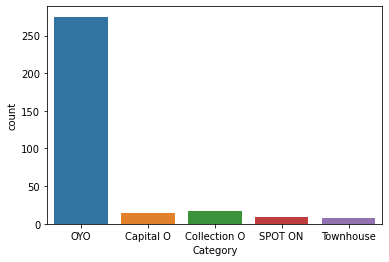

In [29]:
sns.countplot(x='Category', data=d3)

<AxesSubplot:>

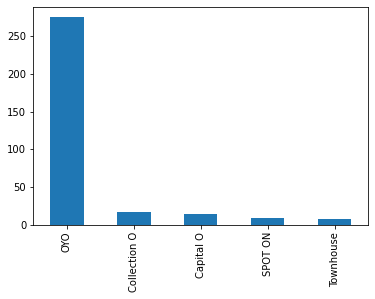

In [36]:
d3["Category"].value_counts().plot.bar()

In [30]:
d3['Cost_Price'].describe()

count     288.000000
mean     2051.906250
std       555.069385
min      1000.000000
25%      1761.000000
50%      2072.500000
75%      2320.250000
max      4397.000000
Name: Cost_Price, dtype: float64

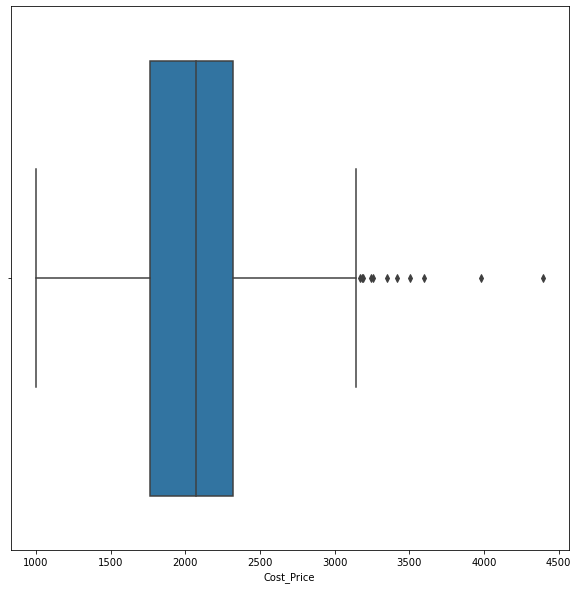

In [31]:
plt.figure(figsize = (10,10))
sns.boxplot(d3["Cost_Price"]);

<AxesSubplot:>

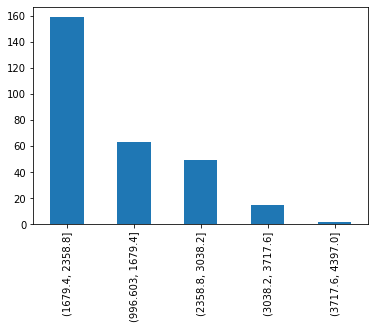

In [32]:
pd.cut(d3['Cost_Price'],5).value_counts().plot(kind = 'bar')

<AxesSubplot:ylabel='Frequency'>

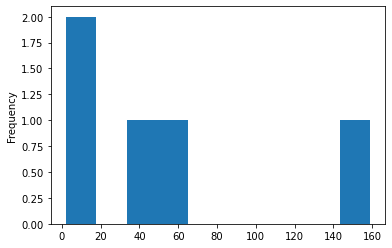

In [33]:
pd.cut(d3['Cost_Price'],5).value_counts().plot(kind = 'hist')

In [34]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 0 to 179
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              326 non-null    object 
 1   Category          323 non-null    object 
 2   Hotel_Name        326 non-null    object 
 3   Locality          306 non-null    object 
 4   Selling_Price     291 non-null    float64
 5   Cost_Price        288 non-null    float64
 6   Discount          291 non-null    float64
 7   Rate              299 non-null    float64
 8   Customer_Rating   299 non-null    object 
 9   Remarks           299 non-null    object 
 10  wifi_availabilty  326 non-null    object 
 11  CCTV Cameras      326 non-null    object 
 12  Doctor on Call    326 non-null    object 
 13  Parking Facility  326 non-null    object 
 14  Power backup      326 non-null    object 
 15  Elevator          326 non-null    object 
 16  Reception         326 non-null    object 
 1

In [35]:
d3.columns

Index(['City', 'Category', 'Hotel_Name', 'Locality', 'Selling_Price',
       'Cost_Price', 'Discount', 'Rate', 'Customer_Rating', 'Remarks',
       'wifi_availabilty', 'CCTV Cameras', 'Doctor on Call',
       'Parking Facility', 'Power backup', 'Elevator', 'Reception', 'AC'],
      dtype='object')

In [64]:
d3.isnull().sum()

City                 0
Category             3
Hotel_Name           0
Locality            20
Selling_Price       35
Cost_Price          38
Discount            35
Rate                27
Customer_Rating     27
Remarks             27
wifi_availabilty     0
CCTV Cameras         0
Doctor on Call       0
Parking Facility     0
Power backup         0
Elevator             0
Reception            0
AC                   0
dtype: int64

In [70]:
d3['Locality'].mode

<bound method Series.mode of 0                    NearCentralGurudwaraSaheb Gowliguda
1                    NearCentralGurudwaraSaheb Gowliguda
2                    NearCentralGurudwaraSaheb Gowliguda
3                    NearCentralGurudwaraSaheb Gowliguda
4                    NearCentralGurudwaraSaheb Gowliguda
                             ...                        
175                       Near Iskcon Temple, kailash , 
176    12,nagali rajapur, behind Lal Hotel, opposite ...
177                  Near Kailash Colony Metro Station, 
178                          Near New  Railway Station, 
179                    Near Rajouri Garden Metro Station
Name: Locality, Length: 326, dtype: object>

In [71]:
d3.mode(axis=1)

,0
0,yes
1,yes
2,yes
3,yes
4,yes
...,...
175,no
176,yes
177,yes
178,no


In [73]:
d3['Selling_Price'].mean()

841.4295532646048